In [1]:
import pandas as pd

In [2]:
data = pd.read_json("tweets/tweets.json")

In [3]:
data

,lat,text,lng,id,timeStamp
0,37.446100,@Tanner_Cortez hey checkout the website: http:...,-121.883557,377652254096228352,2013-09-11 04:38:08+00:00
1,34.087406,@Lennayy7 😪,-117.462604,377652255346159616,2013-09-11 04:38:08+00:00
2,37.356131,i laugh a lot with that line,-121.842867,377652262325456897,2013-09-11 04:38:10+00:00
3,37.364664,sons of anarchy is back on woop woop,-122.009629,377652264682655744,2013-09-11 04:38:11+00:00
4,37.382600,Drinking a Fresh Squeezed IPA by @deschutesbee...,-121.995000,377652271116722176,2013-09-11 04:38:12+00:00
...,...,...,...,...,...
99995,34.468682,I miss jumping Burke and Austin in weight trai...,-118.560411,378989660057239552,2013-09-14 21:12:30+00:00
99996,37.302844,"Before, During, and After the run. #colourmer...",-121.853312,378989667414441984,2013-09-14 21:12:32+00:00
99997,37.807181,Gara 7 @americascup #sf @fabricapo @internetli...,-122.437181,378989681280438273,2013-09-14 21:12:35+00:00
99998,37.645648,@dark_Jero esto fue un twist de alguien q sabe...,-122.455342,378989693112557568,2013-09-14 21:12:38+00:00


# Part 1

## Calculate data point density

In [4]:
from haversine import haversine
# Student ID: 99104468
# centroid: [39.38048783332028, -121.51380397819406]
lat_ID = 39.38048783332028
lng_ID = -121.51380397819406
density_within_50_kilometer = (data.apply(lambda x: haversine((x["lat"], x["lng"]), (lat_ID, lng_ID)), axis=1) < 50).sum()

In [5]:
density_within_50_kilometer

936

## Calculate all X, Y components to use in learnings

In [6]:
minimum_lat = min(data["lat"])
maximum_lng = max(data["lng"])

In [ ]:
from pyproj import Proj

def lat_lng_to_xy(lat, lng, origin_lat, origin_lng):
    # Define the projection using the Mercator projection (EPSG:3857)
    projection = Proj(init='epsg:3857')

    # Transform the origin coordinates
    origin_x, origin_y = projection(origin_lng, origin_lat)

    # Transform the target coordinates
    target_x, target_y = projection(lng, lat)

    # Calculate the x and y components
    x = target_x - origin_x
    y = target_y - origin_y

    return [x, y]

# Example usage


data["X,Y"] = data.apply(lambda x: lat_lng_to_xy(x["lat"], x["lng"], minimum_lat, maximum_lng), axis=1)
data

In [7]:
# data.to_csv("tweets/tweets_with_coordinates.csv")
data = pd.read_csv("tweets/tweets_with_coordinates.csv")
# data.apply(lambda x: list(map(float, x["X,Y"][1:-1].split(", "))), axis=1)
data["X,Y"] = data.apply(lambda x: list(map(float,(x["X,Y"][1:-1].split(", ")))), axis=1)
data

,Unnamed: 0,lat,text,lng,id,timeStamp,"X,Y"
0,0,37.446100,@Tanner_Cortez hey checkout the website: http:...,-121.883557,377652254096228352,2013-09-11 04:38:08+00:00,"[-779834.5151019301, 641959.9370691082]"
1,1,34.087406,@Lennayy7 😪,-117.462604,377652255346159616,2013-09-11 04:38:08+00:00,"[-287696.29390566424, 181033.3451544866]"
2,2,37.356131,i laugh a lot with that line,-121.842867,377652262325456897,2013-09-11 04:38:10+00:00,"[-775304.9840208814, 629352.6132790274]"
3,3,37.364664,sons of anarchy is back on woop woop,-122.009629,377652264682655744,2013-09-11 04:38:11+00:00,"[-793868.7759264633, 630547.7378742038]"
4,4,37.382600,Drinking a Fresh Squeezed IPA by @deschutesbee...,-121.995000,377652271116722176,2013-09-11 04:38:12+00:00,"[-792240.3075859379, 633060.1242801617]"
...,...,...,...,...,...,...,...
99995,99995,34.468682,I miss jumping Burke and Austin in weight trai...,-118.560411,378989660057239552,2013-09-14 21:12:30+00:00,"[-409903.6602287255, 232398.28047327278]"
99996,99996,37.302844,"Before, During, and After the run. #colourmer...",-121.853312,378989667414441984,2013-09-14 21:12:32+00:00,"[-776467.6348389871, 621892.5759545383]"
99997,99997,37.807181,Gara 7 @americascup #sf @fabricapo @internetli...,-122.437181,378989681280438273,2013-09-14 21:12:35+00:00,"[-841463.7058534417, 692711.4987143283]"
99998,99998,37.645648,@dark_Jero esto fue un twist de alguien q sabe...,-122.455342,378989693112557568,2013-09-14 21:12:38+00:00,"[-843485.3869181015, 669976.7514340286]"


## Plot Whole Data

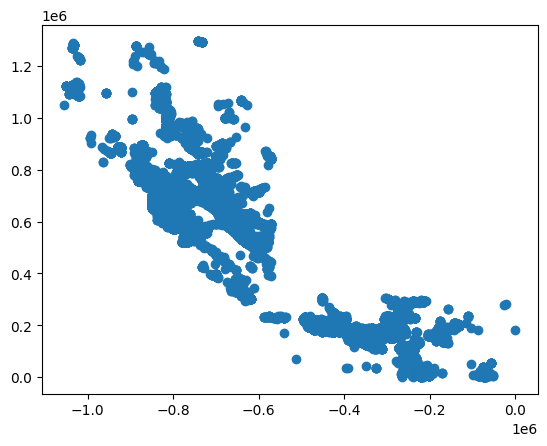

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data.apply(lambda x: x["X,Y"][0], axis=1), data.apply(lambda x: x["X,Y"][1], axis=1))

# Part 2

## make data ready

In [9]:
from datetime import datetime, timezone
from sklearn.preprocessing import StandardScaler
# make the data for passing to the model
# data_model = pd.DataFrame({"time": data["timeStamp"],
#               "X_component": data.apply(lambda x: x["X,Y"][0], axis=1),
#               "Y_component": data.apply(lambda x: x["X,Y"][1], axis=1)})
# # turn time_stamp to numerical peresentation
# desired_timezone = timezone.utc
# data_model["time"] = pd.to_datetime(data_model["time"], utc=True)
# refrence_point = datetime(1970, 1, 1, tzinfo=timezone.utc)
# data_model["time"] = (data_model["time"] - refrence_point).dt.total_seconds()
X = data.apply(lambda x: x["X,Y"][0], axis=1)
Y = data.apply(lambda x: x["X,Y"][1], axis=1)
# STD = StandardScaler()
# X = STD.fit_transform(X.values.reshape(-1,1))
# Y = STD.transform(Y.values.reshape(-1,1))

data_model = pd.DataFrame({
              "X_component": X.squeeze(),
              "Y_component": Y.squeeze()})

data_model.dropna(inplace=True)
data_model

,X_component,Y_component
0,-779834.515102,641959.937069
1,-287696.293906,181033.345154
2,-775304.984021,629352.613279
3,-793868.775926,630547.737874
4,-792240.307586,633060.124280
...,...,...
99995,-409903.660229,232398.280473
99996,-776467.634839,621892.575955
99997,-841463.705853,692711.498714
99998,-843485.386918,669976.751434


In [11]:
from sklearn.cluster import KMeans
from time import time
start = time()
n = 100
model = KMeans(n_clusters=n, init="k-means++", max_iter=500, n_init=20, random_state=42)
y_predict = model.fit_predict(data_model)
end = time()
data_model["name"] = y_predict
print(f"Model Score calculated as : {model.score(data_model)}")
print(f"The prosses took {end-start} seconds")
data_model

Model Score calculated as : -5877686953057.103
The prosses took 17.48813796043396 seconds


,X_component,Y_component,name
0,-779834.515102,641959.937069,24
1,-287696.293906,181033.345154,6
2,-775304.984021,629352.613279,87
3,-793868.775926,630547.737874,48
4,-792240.307586,633060.124280,48
...,...,...,...
99995,-409903.660229,232398.280473,18
99996,-776467.634839,621892.575955,5
99997,-841463.705853,692711.498714,43
99998,-843485.386918,669976.751434,47


Text(0.5, 1.0, 'Cluster Location')

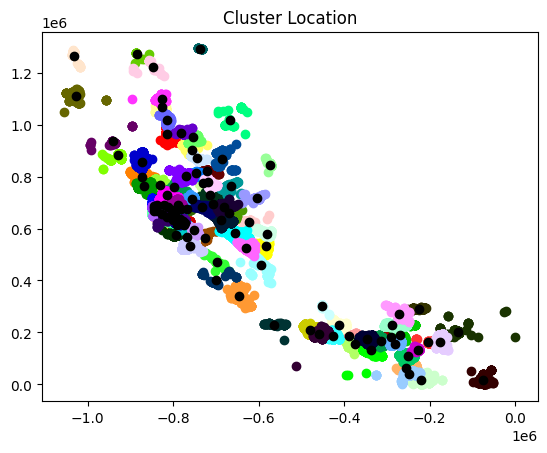

In [13]:
import matplotlib.pyplot as plt
import colors_kit
import numpy as np
# using my color_kit - made by me long ago :)
colors = np.array(colors_kit.color1).reshape(-1,)
for i in range(n):
    plt.scatter(data_model[data_model["name"]==i].iloc[:,0], data_model[data_model["name"]==i].iloc[:,1], marker="o", color=colors[i], label=i)

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="o", color="black", label="centers")
# plt.legend()
plt.title("Cluster Location")

### Experiment Tracking for 3th part

In [ ]:
data_time_save = {}
n_c = [500, 1000, 5000, 10000]
for n in n_c:
    start = time()
    model = KMeans(n_clusters=n, init="k-means++", max_iter=500, n_init=10, random_state=42)
    y_predict = model.fit_predict(data_model)
    end = time()
    data_model["name"] = y_predict
    print(f"Model Score calculated as : {model.score(data_model)}")
    print(f"The prosses took {end-start} seconds")
    data_time_save[f"{n} clusters"] = end-start


# using my color_kit - made by me long ago :)
# colors = []
# for _ in range(10):
    # colors.append(colors_kit.color1)
# colors = np.array(colors).reshape(-1,)
# print(len(colors))
# for i in range(n):
    # plt.scatter(data_model[data_model["name"]==i].iloc[:,1], data_model[data_model["name"]==i].iloc[:,2], marker=".", color=colors[i], label=i)

# plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,2], marker=".", color="black", label="centers")
# plt.legend()
# plt.title("Cluster Location")

Model Score calculated as : -12351046007598.76
The prosses took 61.80879473686218 seconds
Model Score calculated as : -5982541706250.949
The prosses took 118.81198334693909 seconds
Model Score calculated as : -1531577996258.4255
The prosses took 1005.6334216594696 seconds
Model Score calculated as : -1582067565658.9316
The prosses took 1942.9042925834656 seconds


In [ ]:
# show the LOG
data_time_save

{'500 clusters': 61.80879473686218,
 '1000 clusters': 118.81198334693909,
 '5000 clusters': 1005.6334216594696,
 '10000 clusters': 1942.9042925834656}

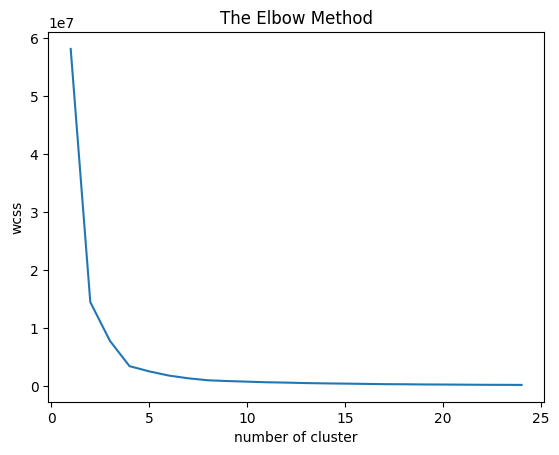

In [ ]:
wcss = []
n_max = 25

for i in range(1, n_max):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, n_max), wcss)
plt.ylabel("wcss")
plt.xlabel("number of cluster")
plt.title("The Elbow Method")
plt.show()
# maybe 4 or 3 cluster is the best

# Mini Batch K Means

Model Score calculated as : -43437958351386.99
The prosses took 0.27076148986816406 seconds


Text(0.5, 1.0, 'Cluster Location')

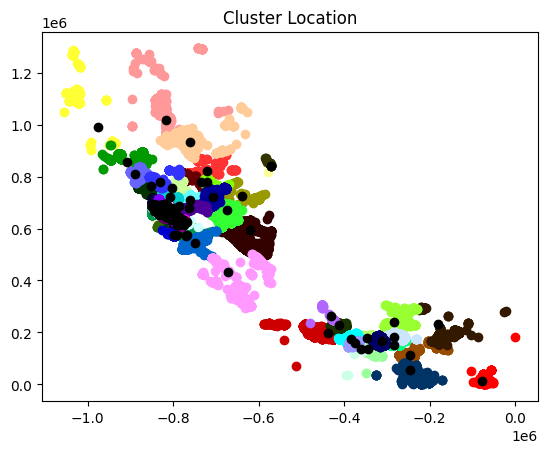

In [14]:
from sklearn.cluster import MiniBatchKMeans
start = time()
n = 100
batch_size = 128
model = MiniBatchKMeans(n_clusters=n, init="k-means++",batch_size=batch_size, max_iter=500, max_no_improvement=10, n_init=10, verbose=0, random_state=42)
y_predict = model.fit_predict(data_model)
end = time()
data_model["name"] = y_predict
print(f"Model Score calculated as : {model.score(data_model)}")
print(f"The prosses took {end-start} seconds")

colors = np.array(colors_kit.color1).reshape(-1,)
for i in range(n):
    plt.scatter(data_model[data_model["name"]==i].iloc[:,0], data_model[data_model["name"]==i].iloc[:,1], marker="o", color=colors[i], label=i)

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="o", color="black", label="centers")
# plt.legend()
plt.title("Cluster Location")

# DBSCAN

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from time import time
min_score = 1000
for eps in [25, 50, 75, 100, 125, 150]:
    for min_sample in [10, 30, 50, 100, 200, 300]:
        start = time()
        model = DBSCAN(eps=eps, min_samples=min_sample)
        model.fit(data_model)
        end = time()
        score = davies_bouldin_score(data_model, model.labels_)
        print(f"Model Score calculated as : {score} [closest to 0 is the best]")
        print(f"The prosses took {end-start} seconds")

        # colors = np.array(colors_kit.color1).reshape(-1,)
        # for i in range(n):
            # plt.scatter(data_model[data_model["name"]==i].iloc[:,0], data_model[data_model["name"]==i].iloc[:,1], marker="o", color=colors[i], label=i)

        # plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="o", color="black", label="centers")
        # plt.legend()
        # plt.title("Cluster Location")
        if min_score > score:
            best_list = [eps, min_sample, score]
            
best_list

Model Score calculated as : 2.0023136046724397 [closest to 0 is the best]
The prosses took 1.5902557373046875 seconds
Model Score calculated as : 1.9045942121926651 [closest to 0 is the best]
The prosses took 1.170600175857544 seconds
Model Score calculated as : 2.071578959321133 [closest to 0 is the best]
The prosses took 1.2491233348846436 seconds
Model Score calculated as : 2.000254539074488 [closest to 0 is the best]
The prosses took 1.227102279663086 seconds
Model Score calculated as : 2.1512890339281947 [closest to 0 is the best]
The prosses took 1.177192211151123 seconds
Model Score calculated as : 1.5044812287328584 [closest to 0 is the best]
The prosses took 1.1177434921264648 seconds
Model Score calculated as : 1.8889950587247386 [closest to 0 is the best]
The prosses took 1.1331140995025635 seconds
Model Score calculated as : 1.8894052110682422 [closest to 0 is the best]
The prosses took 1.0816304683685303 seconds
Model Score calculated as : 1.9896600224638168 [closest to 0 

[150, 300, 1.5213552988328083]

In [18]:
# the best model:
start = time()
model = DBSCAN(eps=150, min_samples=300)
model.fit(data_model)
end = time()
score = davies_bouldin_score(data_model, model.labels_)
print(f"Model Score calculated as : {score} [closest to 0 is the best]")
print(f"The prosses took {end-start} seconds")

# colors = np.array(colors_kit.color1).reshape(-1,)
# for i in range(n):
    # plt.scatter(data_model[data_model["name"]==i].iloc[:,0], data_model[data_model["name"]==i].iloc[:,1], marker="o", color=colors[i], label=i)

# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="o", color="black", label="centers")
# plt.legend()
# plt.title("Cluster Location")

Model Score calculated as : 1.5213552988328083 [closest to 0 is the best]
The prosses took 1.428633451461792 seconds


### for special case in question

In [37]:
for eps in [330]:
    start = time()
    model = DBSCAN(eps=eps, min_samples=100)
    model.fit(data_model)
    end = time()
    score = davies_bouldin_score(data_model, model.labels_)
    print(f"Model Score calculated as : {score} [closest to 0 is the best]")
    print(f"The prosses took {end-start} seconds")
    labels = model.labels_
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(num_clusters)

# 330 is eps for 100 clusters

Model Score calculated as : 1.5852263658289025 [closest to 0 is the best]
The prosses took 1.0298428535461426 seconds
100
